# STOR 120 - Take Home Midterm 3

**Due:** Wednesday 4/16/25 before class

**Directions:** The exam is open book, notes, course materials, and internet, BUT if you are found to be submitting the work of other students as your exam submission, an honor code violation will be reported. This could be by communication with others and the sharing of answers and code: during the exam time, with students in other sections of the course, by using the solutions to exams from previous semesters, or online answer tools or generative AI such as Chegg, CourseHero, ChatGPT, etc. This is a zero tolerance policy and all suspected honor code violations will be reported. Just as with all course assignments, you should submit this exam to Gradescope as a Jupyter Notebook with the ipynb file extension. To receive full credit, you should show and run all of your code used to answer each question. You can and SHOULD use or adapt functions that we have written in class or from the textbook. 

**To receive credit for your answers you must use the code and methods that we have covered in class!**

**Check your file on Gradescope to ensure that it is the file that you intended to submit!**

In [2]:
# Run this cell to set up your notebook

from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

from scipy.stats import norm
from scipy.stats import t

**Data:** According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths. The `strokeA` includes columns such as sex, age, history of various diseases (1 = history of disease; 0 = no history of disease), smoking status, and history of stroke (1 = have had a stroke; 0 = have not had a stroke), where each row in the data represents information about one patient.

In [5]:
# Run this cell to import the dataset

strokeA = Table.read_table('strokeA.csv')
strokeA.show(5)

**Question 1.1.** Construct a scatterplot with `bmi` on the vertical axis and `age` on the horizontal axis. Include the best fit regression line on the plot.

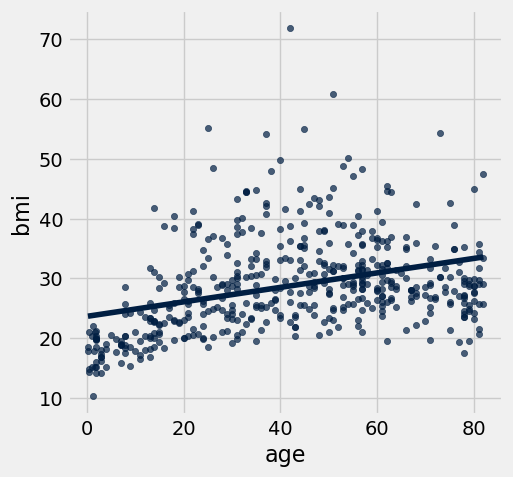

In [7]:
strokeA.scatter('age','bmi',fit_line=True)

**Question 1.2.** Determine the values for the correlation, slope, and intercept when constructing a least squares regression line using `age` to predict `bmi`. Assign these values (respectively) to the names below.

In [15]:
age_sd = np.std(strokeA.column('age'))
age_mean = np.mean(strokeA.column('age'))

bmi_sd = np.std(strokeA.column('bmi'))
bmi_mean = np.mean(strokeA.column('bmi'))

age_standard_units = (strokeA.column('age') - age_mean) / age_sd
bmi_standard_units = (strokeA.column('bmi') - bmi_mean) / bmi_sd

q1_2_correlation = np.mean(age_standard_units * bmi_standard_units)
q1_2_slope = q1_2_correlation * bmi_sd / age_sd
q1_2_intercept = bmi_mean - q1_2_slope * age_mean

q1_2_correlation, q1_2_slope, q1_2_intercept

(0.34995151877111424, 0.12117808454544401, 23.652645461179862)

**Question 1.3.** Construct a residual plot with the residuals of the model constructed in the previous question on the vertical axis and the fitted values of the model on the horizontal axis. Comment on the two conditions for a linear model as discussed in class and how this model does or does not meet these conditions.

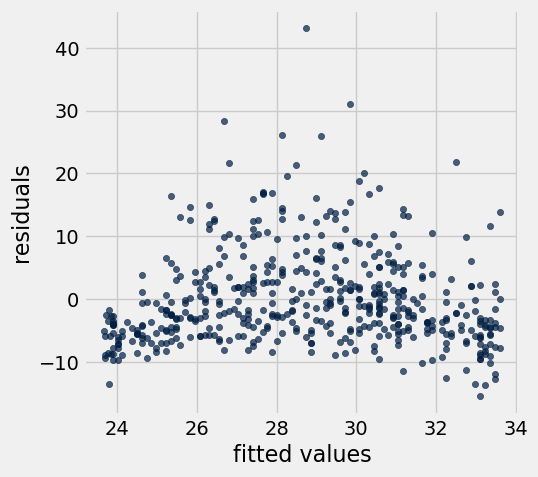

In [23]:
fitted_values = q1_2_slope * strokeA.column('age') + q1_2_intercept
residuals = strokeA.column('bmi') - fitted_values

t = Table().with_columns(
    'fitted values', fitted_values,
    'residuals', residuals
)

t.scatter('fitted values', 'residuals')

The two conditions for a linear model we discussed in class were linearity and homoscedascity. This model doesn't seem to meet the condition of linearity because the plot does show a slight curve which indicates that the relationship between age and bmi may not be completely linear. The model doesn't seem to meet the condition of homoscedascity either because the spread of residuals seems to increase with higher fitted values.

**Question 1.4.** For what value of `age` in the data does the model predict the largest in magnitude (positive or negative) residual value? Assign this value to `age_worst_pred` and the value of this residual to `bmi_resid_worst_pred`. 

In [38]:
largest_residual = abs(residuals).tolist().index(max(abs(residuals)))
age_worst_pred = strokeA.column('age').item(largest_residual)
bmi_resid_worst_pred = residuals.item(largest_residual)

age_worst_pred, bmi_resid_worst_pred

(42.0, 43.1578749879115)

**Question 1.5.** Use the model constructed in the previous questions to construct a 90% confidence interval for the mean `bmi` of someone that is 70 years old. To receive credit you should use the bootstrapping methods as done in class. Assign the lower and upper bounds of this interval to `q1_5_lower_bound` and `q1_5_upper_bound`. You do not need to plot the simulated data. The values of the bounds should not be hardcoded (i.e. do not just type in numbers). 

In [51]:
bmi_sample = make_array()
bmi_70 = strokeA.where('age',are.equal_to(70))

for i in np.arange(100):
    bootstrap_sample = bmi_70.sample()
    bmi_mean = np.mean(bootstrap_sample.column('bmi'))
    bmi_sample = np.append(bmi_sample, bmi_mean)

q1_5_lower_bound = percentile(5, bmi_sample)
q1_5_upper_bound = percentile(95, bmi_sample)

q1_5_lower_bound, q1_5_upper_bound 

(24.266666666666666, 28.5)

**Question 1.6.** From the plots in the previous questions you should see that the data does not seem to follow a linear pattern. Use the minimization methods that we have used in class to find the coefficients for a cubic curve of the form $ax^3+bx^2+cx+d$ that best fits the data. Assign an array of these values a, b, c, and d (in this order) to the name `cubic_coef`.

In [58]:
def stroke_rmse(a,b,c,d):
    x = strokeA.column('age')
    y = strokeA.column('bmi')
    estimate = a*x**3 + b*x**2 + c*x + d
    return np.sqrt(np.mean((y-estimate)**2))

cubic_coef = minimize(stroke_rmse)
cubic_coef

array([ -6.76926890e-05,   2.93845852e-03,   2.96036368e-01,
         1.90752070e+01])

**Question 1.7.** Use the coefficients of the model constructed in the previous question to predict the mean `bmi` for someone that is 70 years old. You do not need to produce a confidence interval, only one value for your estimate. Assign this value to `cubic_pred_18`.

In [63]:
cubic_pred_18 = -6.76926890e-05 * 70**3 + 2.93845852e-03 * 70**2 + 2.96036368e-01 * 70 + 1.90752070e+01
cubic_pred_18

30.977607180999996

**Question 1.8.** Construct a scatterplot with `bmi` on the vertical axis and `age` on the horizontal axis. Include the best fit cubic curve constructed in the previous questions on the plot.

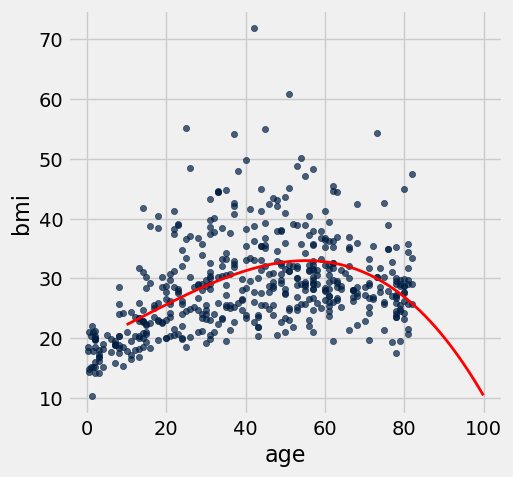

In [88]:
strokeA.scatter('age','bmi')

x = np.arange(10,100,0.05)
y = cubic_coef.item(0) * x **3 + cubic_coef.item(1) * x**2 + cubic_coef.item(2) * x + cubic_coef.item(3)

plots.plot(x,y,color='red',lw=2)

**Question 1.9.** Determine the value of the RMSE for the linear model constructed in question 1.2 and the RMSE for the cubic model constructed in question 1.6. Assign these values to `RMSE_linear` and `RMSE_cubic`, respectively. Comment briefly on what these values tell you about using the models to predict mean `bmi`. 

In [99]:
RMSE_linear = np.sqrt(np.mean(y- (q1_2_slope * x + q1_2_intercept))**2)
RMSE_cubic = np.sqrt(np.mean(y - (cubic_coef.item(0) * x**3 + cubic_coef.item(1) * x**2 + cubic_coef.item(2) * x + cubic_coef.item(3))) **2)

RMSE_linear, RMSE_cubic

(2.8832515939259635, 0.0)

The linear RMSE being 2.88 compared to the cubic RMSE being 0 tells us that there is less error in using our cubic model. There is more error with the linear so cubic is the best model to use for predicting mean bmi.

**Question 2.**  Conduct a hypothesis test at the 5% significance level to investigate the claim that the proportion of those with high blood pressure (`hypertension` = 1) in a `Rural` `Residence_type` is higher than the proportion of those with high blood pressure (`hypertension` = 1) in an `Urban` `Residence_type`. To receive full credit you should use methods with the normal distribution as done in class and include all parts of the hypothesis test, including citing your hypotheses, value of the observed proportion, a plot comparing the observed data and normal distribution (either in original or standardized units), the p-value, and your conclusion. You should not perform a simulation and you can assume that the Central Limit Theorem can be applied. You can add code or Markdown cells as needed.

In [123]:
Null hypothesis: The proportion of those with high blood pressure in a rural location is equal to the proportion of those in an urban area.
Alternative hypothesis: The proportion of those with high blood pressure in a rural location 
is greater than the proportion of those in an urban location.

SyntaxError: invalid syntax (288423003.py, line 1)

In [109]:
rural = strokeA.where('Residence_type', are.equal_to('Rural'))
urban = strokeA.where('Residence_type',are.equal_to('Urban'))

p_rural = np.mean(rural.column('hypertension') == 1)
p_urban = np.mean(urban.column('hypertension') == 1)

observed_diff = p_rural - p_urban
observed_diff

0.035860655737704916

In [113]:
standard_error = np.sqrt((p_rural * (1 - p_rural)) / rural.num_rows + (p_urban * (1 - p_urban)) / urban.num_rows)
standard_error

0.024338208265924314

In [117]:
z_score = observed_diff / standard_error
z_score

1.47343039166581

In [121]:
p_value = 1 - norm.cdf(z_score)
p_value

0.07031751019793453

In [125]:
At the 5% significance level the p-value is 0.07, greater than 0.05. We fail to reject the null hypothesis. There is not enough
evidence to claim that the proportion of those with high blood pressure in rural locations is greater than the proportion of those
in an urban location.

SyntaxError: invalid syntax (523538260.py, line 1)